# CLIMATE 405: Machine Learning for Earth and Environmental Sciences; FALL 2024
## Prof. Mohammed Ombadi (ombadi@umich.edu)

# Lecture 3 (Wednesday, 09/04/2024)
# Topics covered in this lecture:
- Statistical Dependence
- Statistical Significance
- Hypothesis Testing
- Feature Selection  

## Import libraries

In [2]:
# Import libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from scipy.integrate import odeint
from IPython.display import Image
from statistics import mode
from scipy.stats import skew, kurtosis, norm, lognorm, genextreme, pearsonr, spearmanr
from sklearn.feature_selection import mutual_info_regression
import statsmodels.api as sm
import pingouin as pg


warnings.filterwarnings('ignore')

# Set the current working directory
os.chdir(sys.path[0])

## <center>Statistical Dependence</center>

### 1- Pearson Correlation Coefficient

A normalized measure of the covariance of two variables. In other words, it is the ratio of the covariance of two variables to the product of their standard deviations.

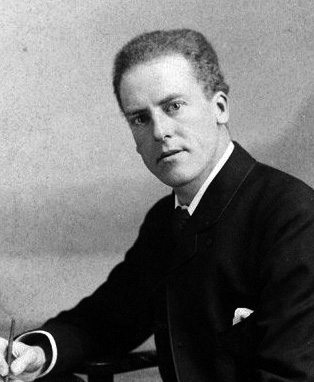

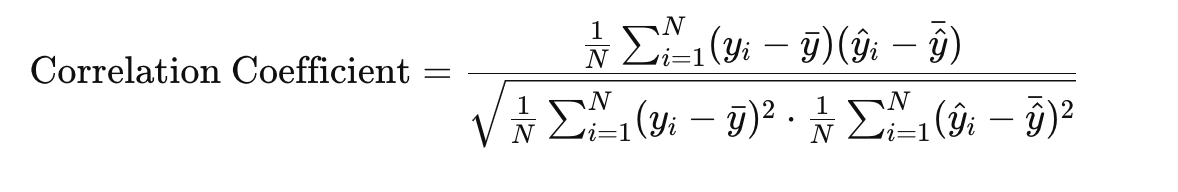

In [3]:
display(Image(filename = 'Karl_Pearson_2.jpg', width= 400, height= 400))
display(Image(filename = 'Correlation Coeff.png', width= 1000, height= 500))

#### Assumption and limitations of Pearson Correlation Coefficient:

- The main assumption of Pearson correlation coefficient is **linearity**
- Other assumptions include: normality and constant variance
- Let's test this with several types of functions: 

Pearson Correlation Coefficient =  1.0


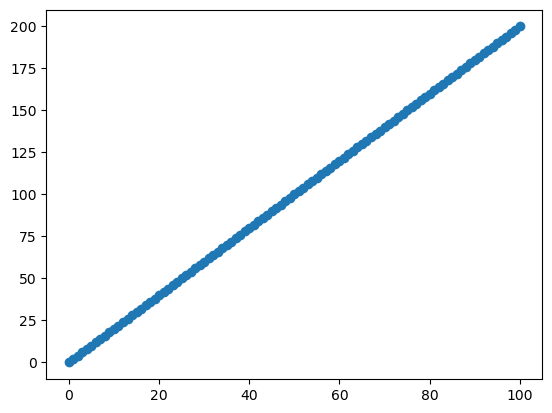

In [4]:
x = np.linspace(0, 100, 101)
#y = x
#y = x + np.random.normal(0, 5, 101)
y = 2*x
plt.plot(x,y,'o')
print('Pearson Correlation Coefficient = ' , pearsonr(x, y)[0])

Now, let's test this with a different relationshi (piecewise linear function)

Pearson Correlation Coefficient =  0.8944008880569649


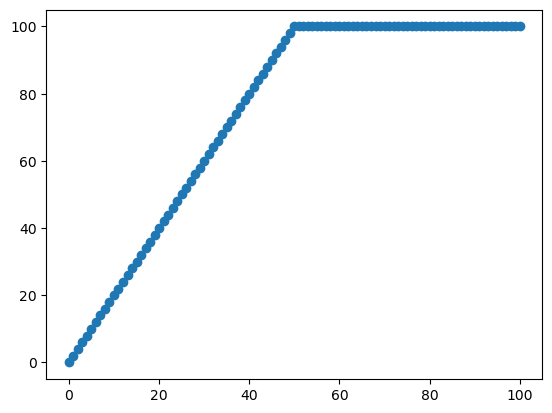

In [5]:
y = np.where(x < 50, 2 * x, 100)
plt.plot(x,y,'o')
print('Pearson Correlation Coefficient = ' , pearsonr(x, y)[0])

### 2- Spearman Correlation Coefficient

Similar to Pearson Correlation Coefficient, but it is based on the ranks of the data. 

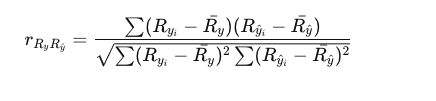

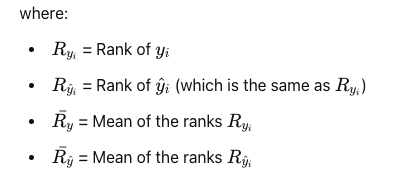

In [8]:
display(Image(filename = 'Spearman Correlation Coefficient.png', width= 600, height= 600))
display(Image(filename = 'Spearman Correlation Coefficient_notations.png', width= 700, height= 700))

#### Assumption and Properties of Spearman's Correlation Coefficient:

- Monotonicity
- It does not assume normality
- Robust to Outliers

Let's demonstrate the properties of Spearman Correlation Coefficient with a few examples:

#### a. Monotonic Linear Function

Pearson Correlation Coefficient =  0.9999999999999994
Spearman Correlation Coefficient =  0.9999999999999999


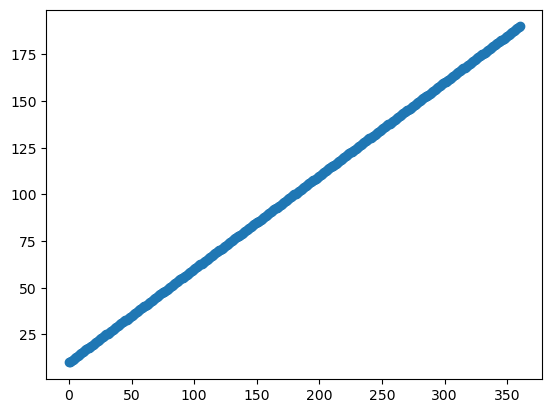

In [9]:
# Example: y = 0.5 * x + 10 (linear and monotonic)
x= np.linspace(0,360, 361)
y = 0.5 * x + 10

plt.plot(x,y,'o')

print('Pearson Correlation Coefficient = ' , pearsonr(x, y)[0])
print('Spearman Correlation Coefficient = ' , spearmanr(x, y)[0])

#### b. Monotonic Nonlinear Function

Pearson Correlation Coefficient =  0.9680784821246966
Spearman Correlation Coefficient =  0.9999999999999999


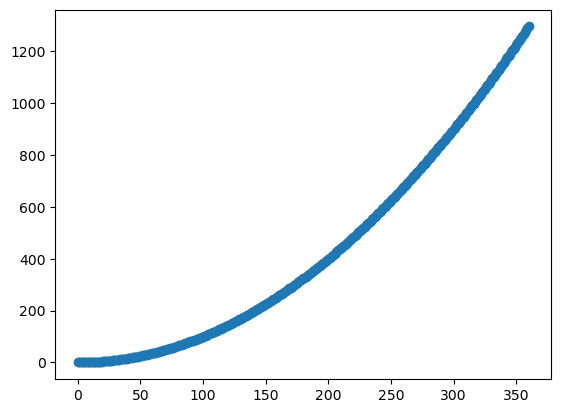

In [10]:
# Example: y = x^2 / 100 (nonlinear but monotonic)
x= np.linspace(0,360, 361)
y= (x**2) / 100

plt.plot(x,y,'o')

print('Pearson Correlation Coefficient = ' , pearsonr(x, y)[0])
print('Spearman Correlation Coefficient = ' , spearmanr(x, y)[0])

#### c. Sinusoidal Function

Pearson Correlation Coefficient =  -0.7764425770696957
Spearman Correlation Coefficient =  -0.7480882725054309


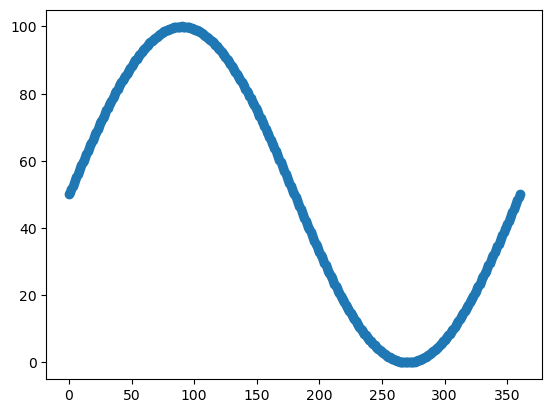

In [11]:
# Example: y = 50 + 50 * sin(x)
x= np.linspace(0,360, 361)
y = 50 + 50 * np.sin(np.radians(x))

plt.plot(x,y,'o')

print('Pearson Correlation Coefficient = ' , pearsonr(x, y)[0])
print('Spearman Correlation Coefficient = ' , spearmanr(x, y)[0])

### 3- Mutual Information

An association measure based on Shannon Entropy. It measures the amount of shared information between the two variables.

In [55]:
# Example: X and y are your features and target variables
mi = mutual_info_regression(x.reshape(-1,1), y.reshape(-1,1))
print(mi)

[3.0704466]


_What are the properties of Mutual Information?_

### 4- Partial Correlation

Partial correlation analysis describes the correlation between two variables (e.g.,
snowmelt and discharge) after removing the effects of other variables (e.g., temperature).
Partial correlation helps spot fake and unrealistic correlations (i.e. correlations explained
by the effect of other variables) as well as to reveal hidden correlations (i.e. correlations
masked by the effect of other variables).

Let's consider the following:
**S** = Streamflow
**P** = Precipitation
**E** = Evapotranspiration 

In [12]:
par_cor_data = pd.read_csv('partial_correlation_data_annual.csv')
par_cor_data.head()

year     P     S     E
0  1980  1003  3276  1260
1  1981   346   170  1395
2  1982   944   860  1208
3  1983  1111  2500  1190
4  1984   454   189  1313

In [70]:
# Set 'year' to a DateTime index
par_cor_data.set_index('year', inplace=True)

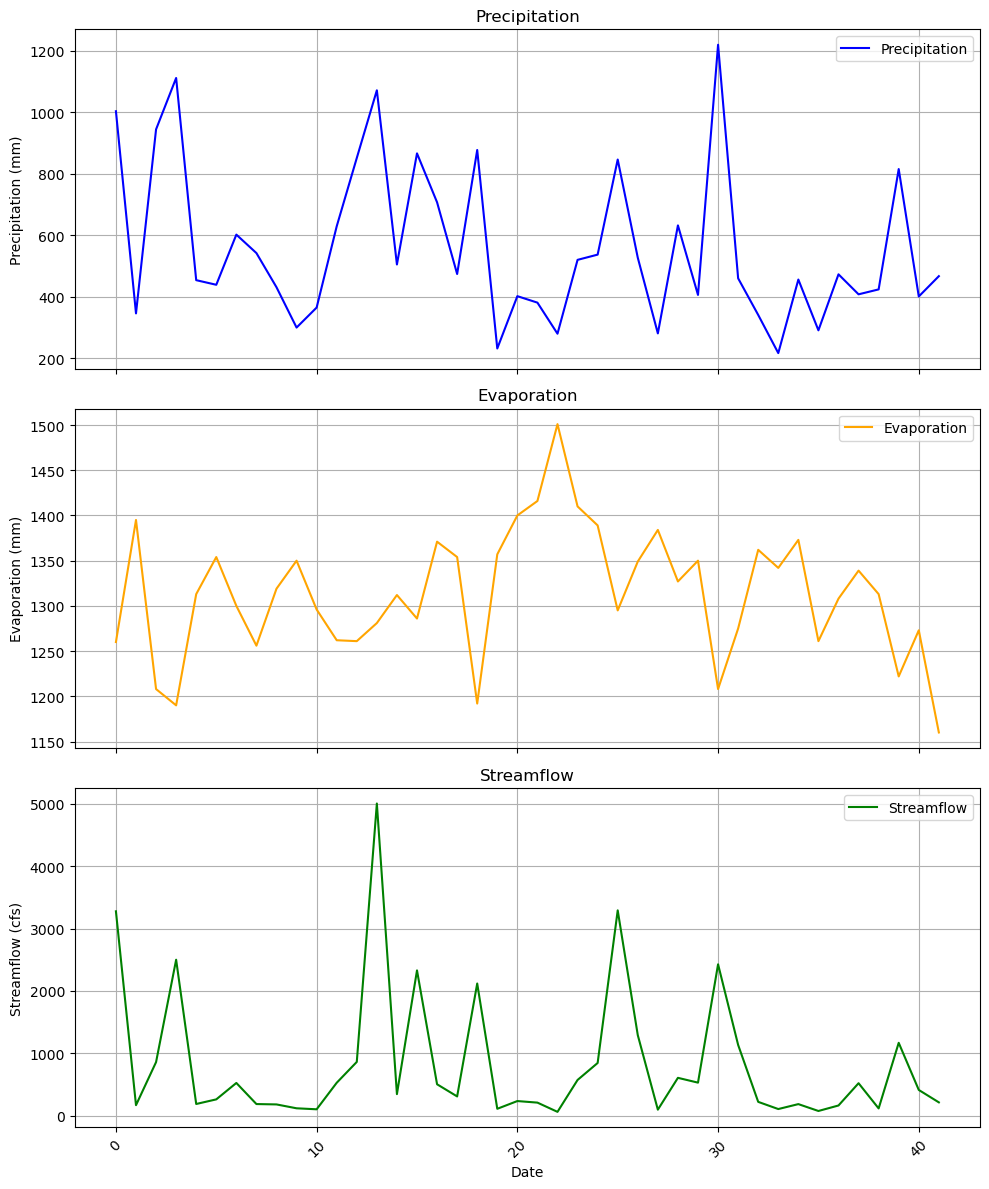

In [13]:
#Create a figure and a set of subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Plot precipitation
axs[0].plot(par_cor_data.index, par_cor_data['P'], label='Precipitation', color='blue')
axs[0].set_title('Precipitation')
axs[0].set_ylabel('Precipitation (mm)')
axs[0].legend()
axs[0].grid(True)

# Plot evaporation
axs[1].plot(par_cor_data.index, par_cor_data['E'], label='Evaporation', color='orange')
axs[1].set_title('Evaporation')
axs[1].set_ylabel('Evaporation (mm)')
axs[1].legend()
axs[1].grid(True)

# Plot streamflow
axs[2].plot(par_cor_data.index, par_cor_data['S'], label='Streamflow', color='green')
axs[2].set_title('Streamflow')
axs[2].set_ylabel('Streamflow (cfs)')
axs[2].set_xlabel('Date')
axs[2].legend()
axs[2].grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

Let's examine the relationship between streamflow and precipitation :

Text(0, 0.5, 'Streamflow [cfs]')

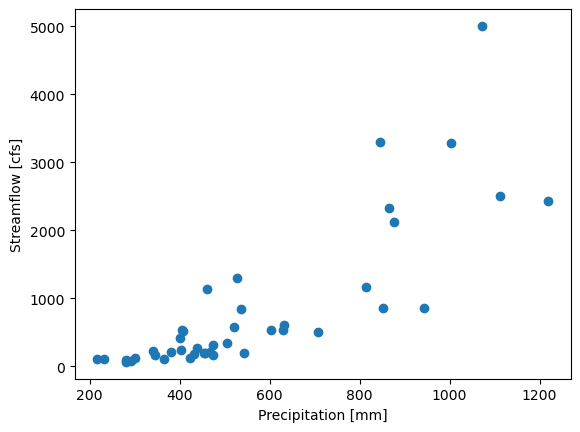

In [14]:
plt.plot(par_cor_data['P'], par_cor_data['S'], 'o')
plt.xlabel('Precipitation [mm]')
plt.ylabel('Streamflow [cfs]')

Now, let's examine the relationship between streamflow and evpaotranspiration:

Text(0, 0.5, 'Streamflow [cfs]')

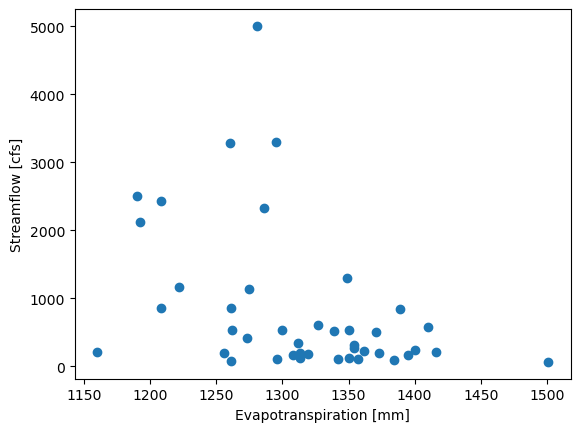

In [15]:
plt.plot(par_cor_data['E'], par_cor_data['S'], 'o')
plt.xlabel('Evapotranspiration [mm]')
plt.ylabel('Streamflow [cfs]')

Mathematical Definition of Partial Correlation:

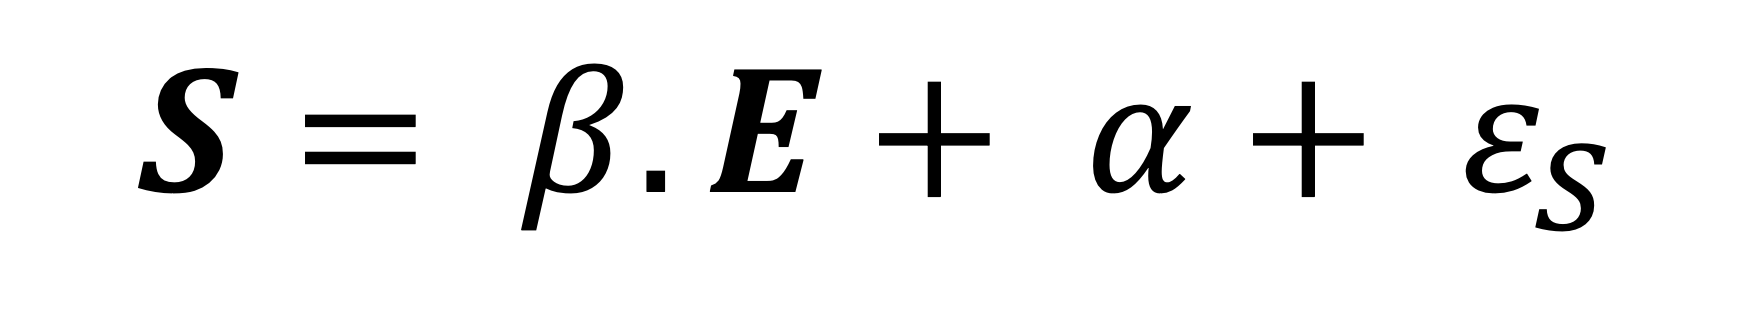

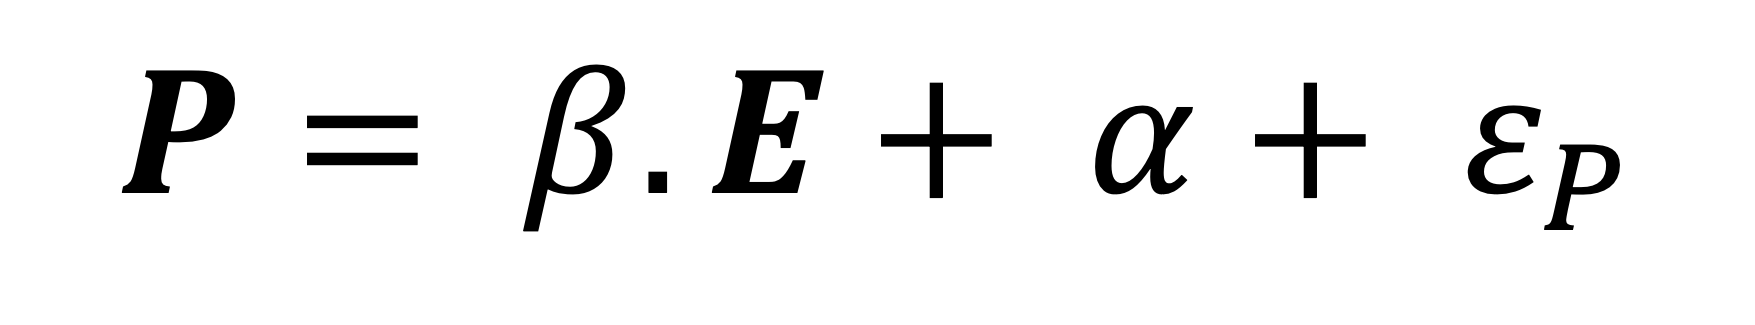

In [16]:
display(Image(filename = 'Par_cor_S_E.png', width= 400, height= 400))
display(Image(filename = 'Par_cor_P_E.png', width= 400, height= 400))

The partial correlation coefficient r(SP.E) is the correlation between **S** and **P** after removing the effect of **E**

It is defined as the correlation coefficient between the residulas epsilon(S) and epsilon(E)

#### Quiz

In [17]:
print('Parital Correlation = ', pg.partial_corr(data=par_cor_data, x='S', y='P', covar='E'))
print('Correlation = ', pearsonr(par_cor_data['S'], par_cor_data['P']) )

Parital Correlation =            n         r         CI95%         p-val
pearson  42  0.782832  [0.63, 0.88]  1.471138e-09
Correlation =  PearsonRResult(statistic=0.8165547200491386, pvalue=4.3279421259679866e-11)


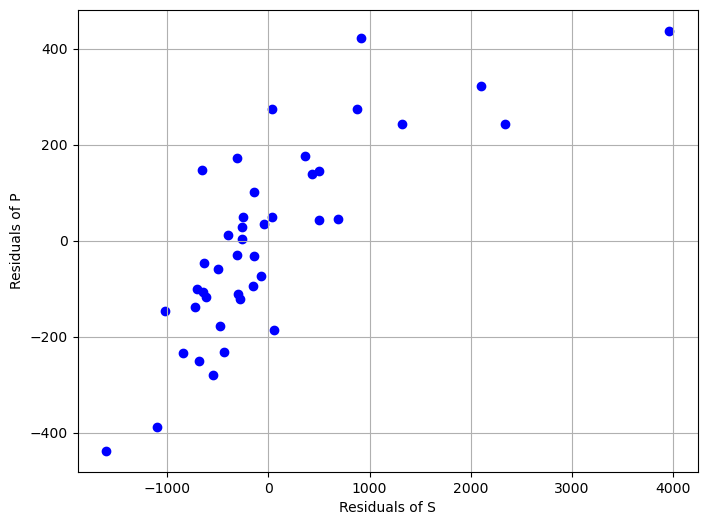

In [18]:
# Add a constant to the model (intercept)
E_with_const = sm.add_constant(par_cor_data['E'])

# Fit model for S and extract residuals
model_S = sm.OLS(par_cor_data['S'], E_with_const).fit()
par_cor_data['S_residual'] = model_S.resid

# Fit model for E and extract residuals
model_P = sm.OLS(par_cor_data['P'], E_with_const).fit()
par_cor_data['P_residual'] = model_P.resid

# Plot the relationship between the residuals of X and Y
plt.figure(figsize=(8, 6))
plt.scatter(par_cor_data['S_residual'], par_cor_data['P_residual'], color='blue')
plt.xlabel('Residuals of S')
plt.ylabel('Residuals of P')
plt.grid(True)
plt.show()

## <center> Hypothesis Testing and Statistical Significance </center>

### Hypothesis Testing in Hydroclimatic variables

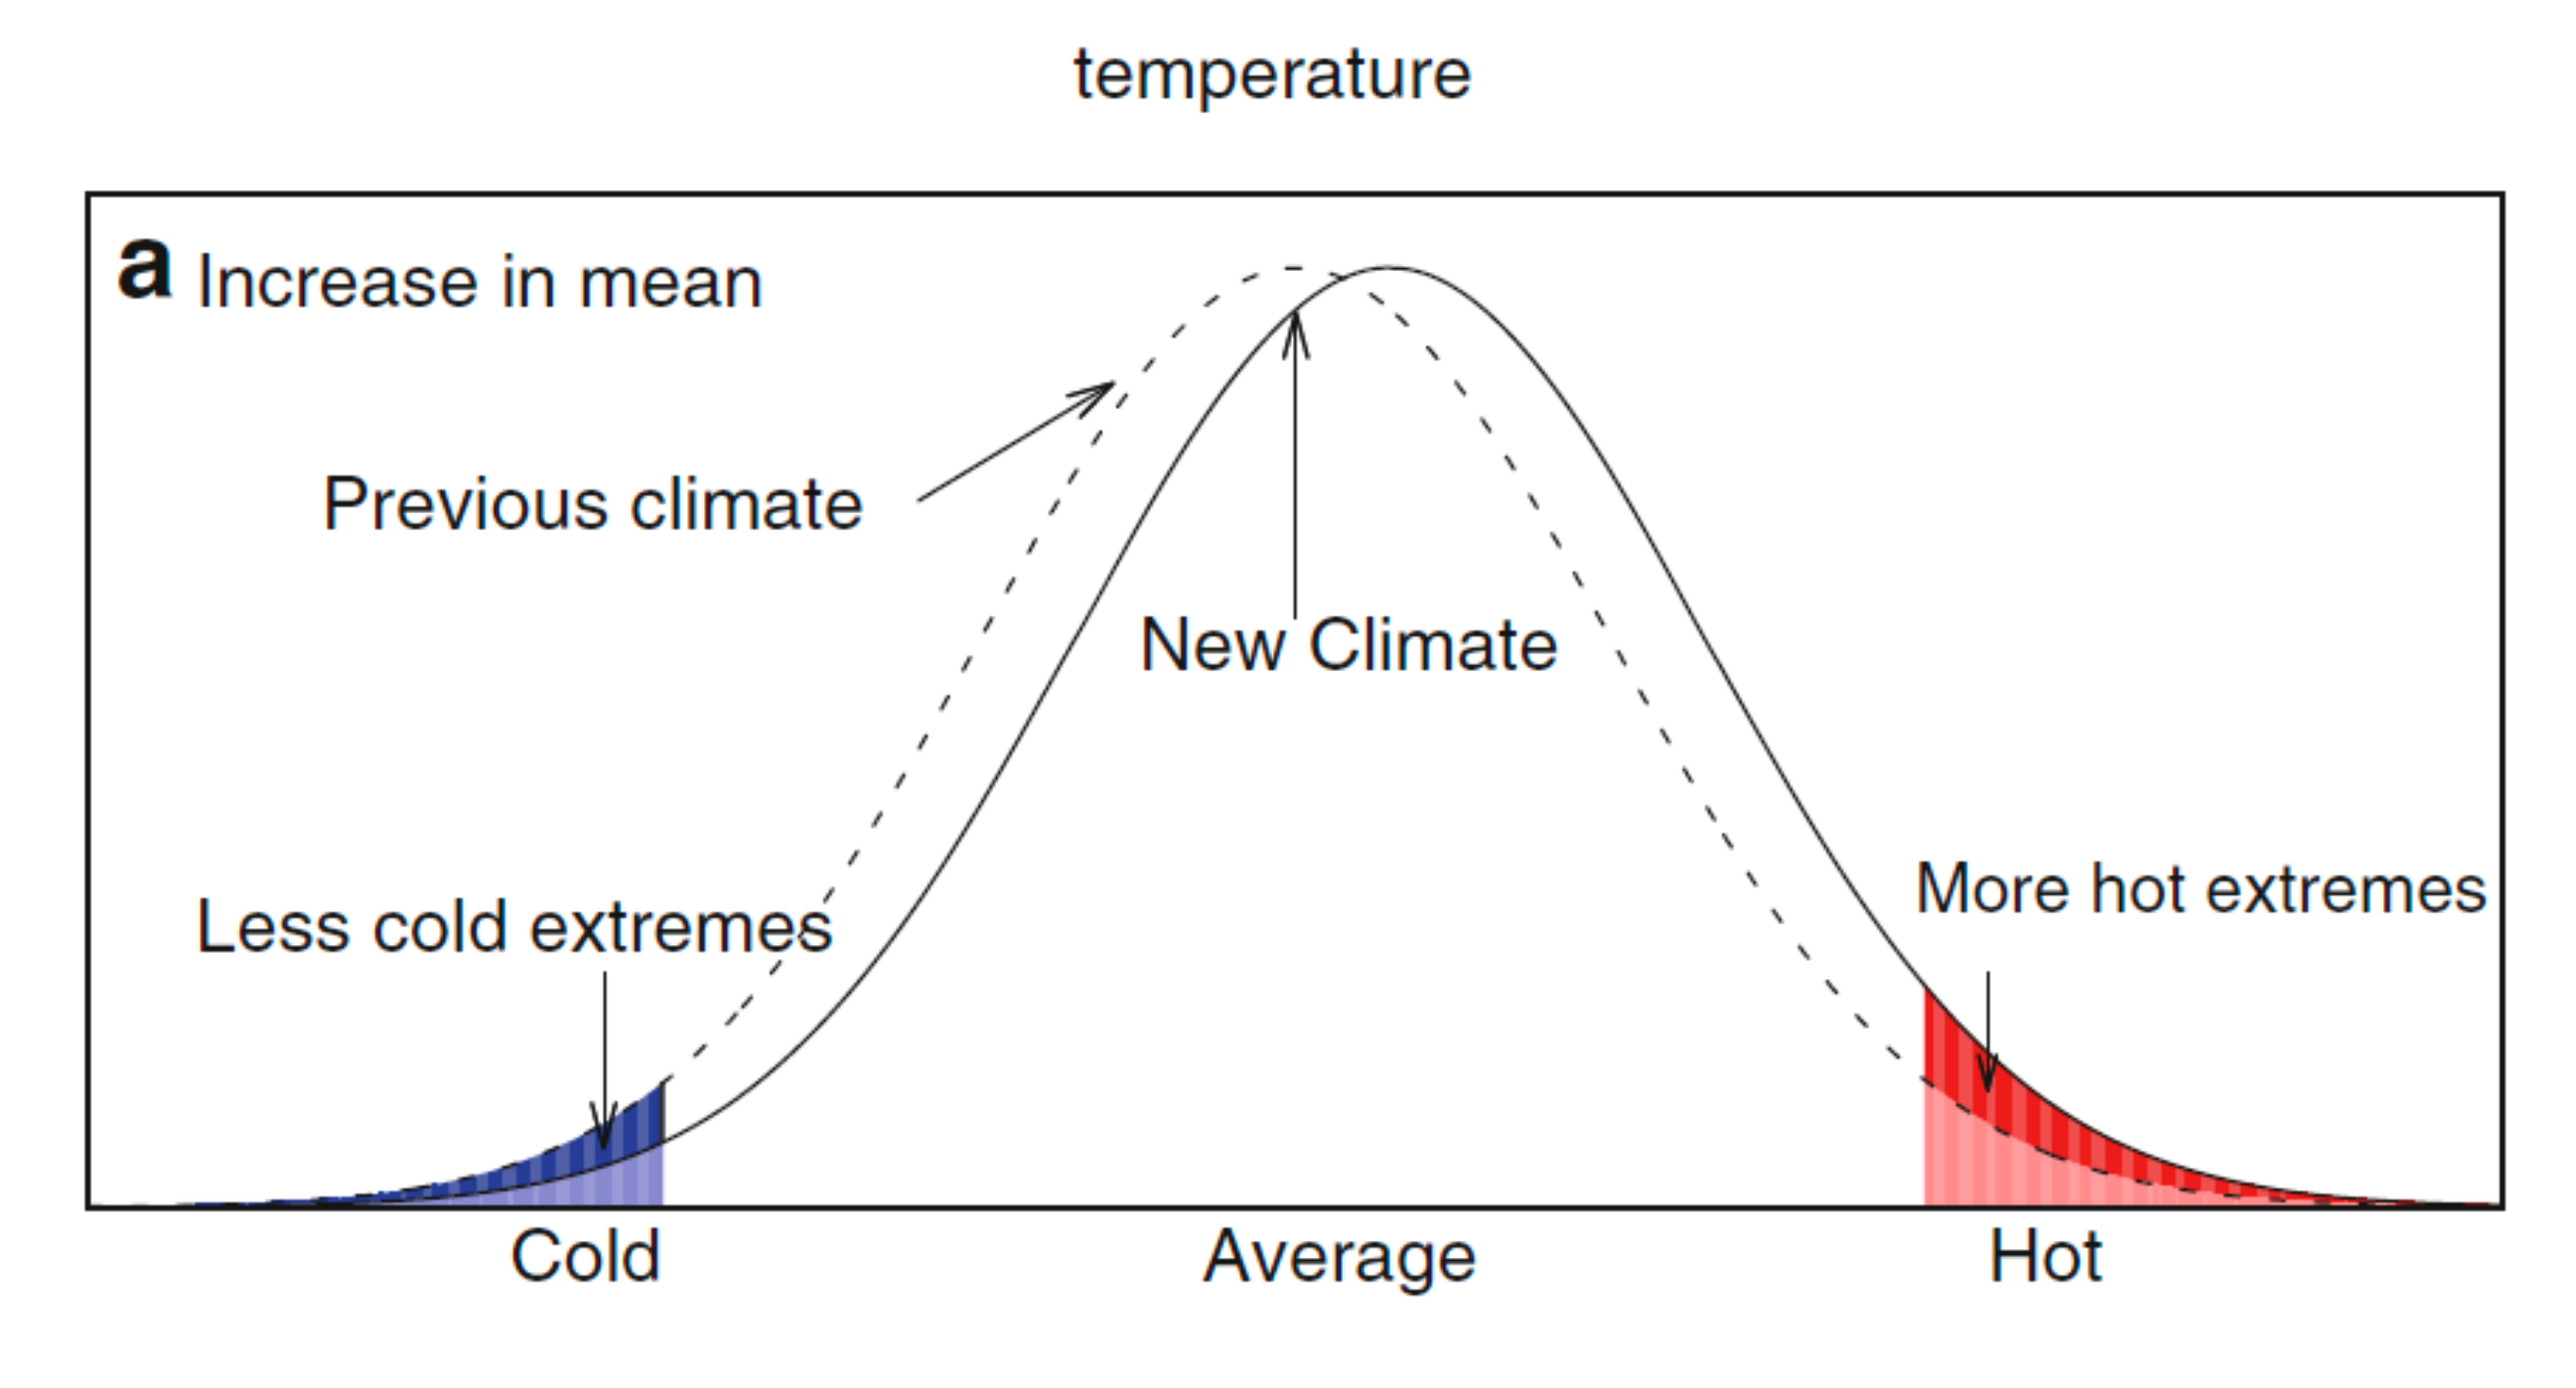

In [19]:
display(Image(filename = 'temperature_a.png', width= 600, height= 600))

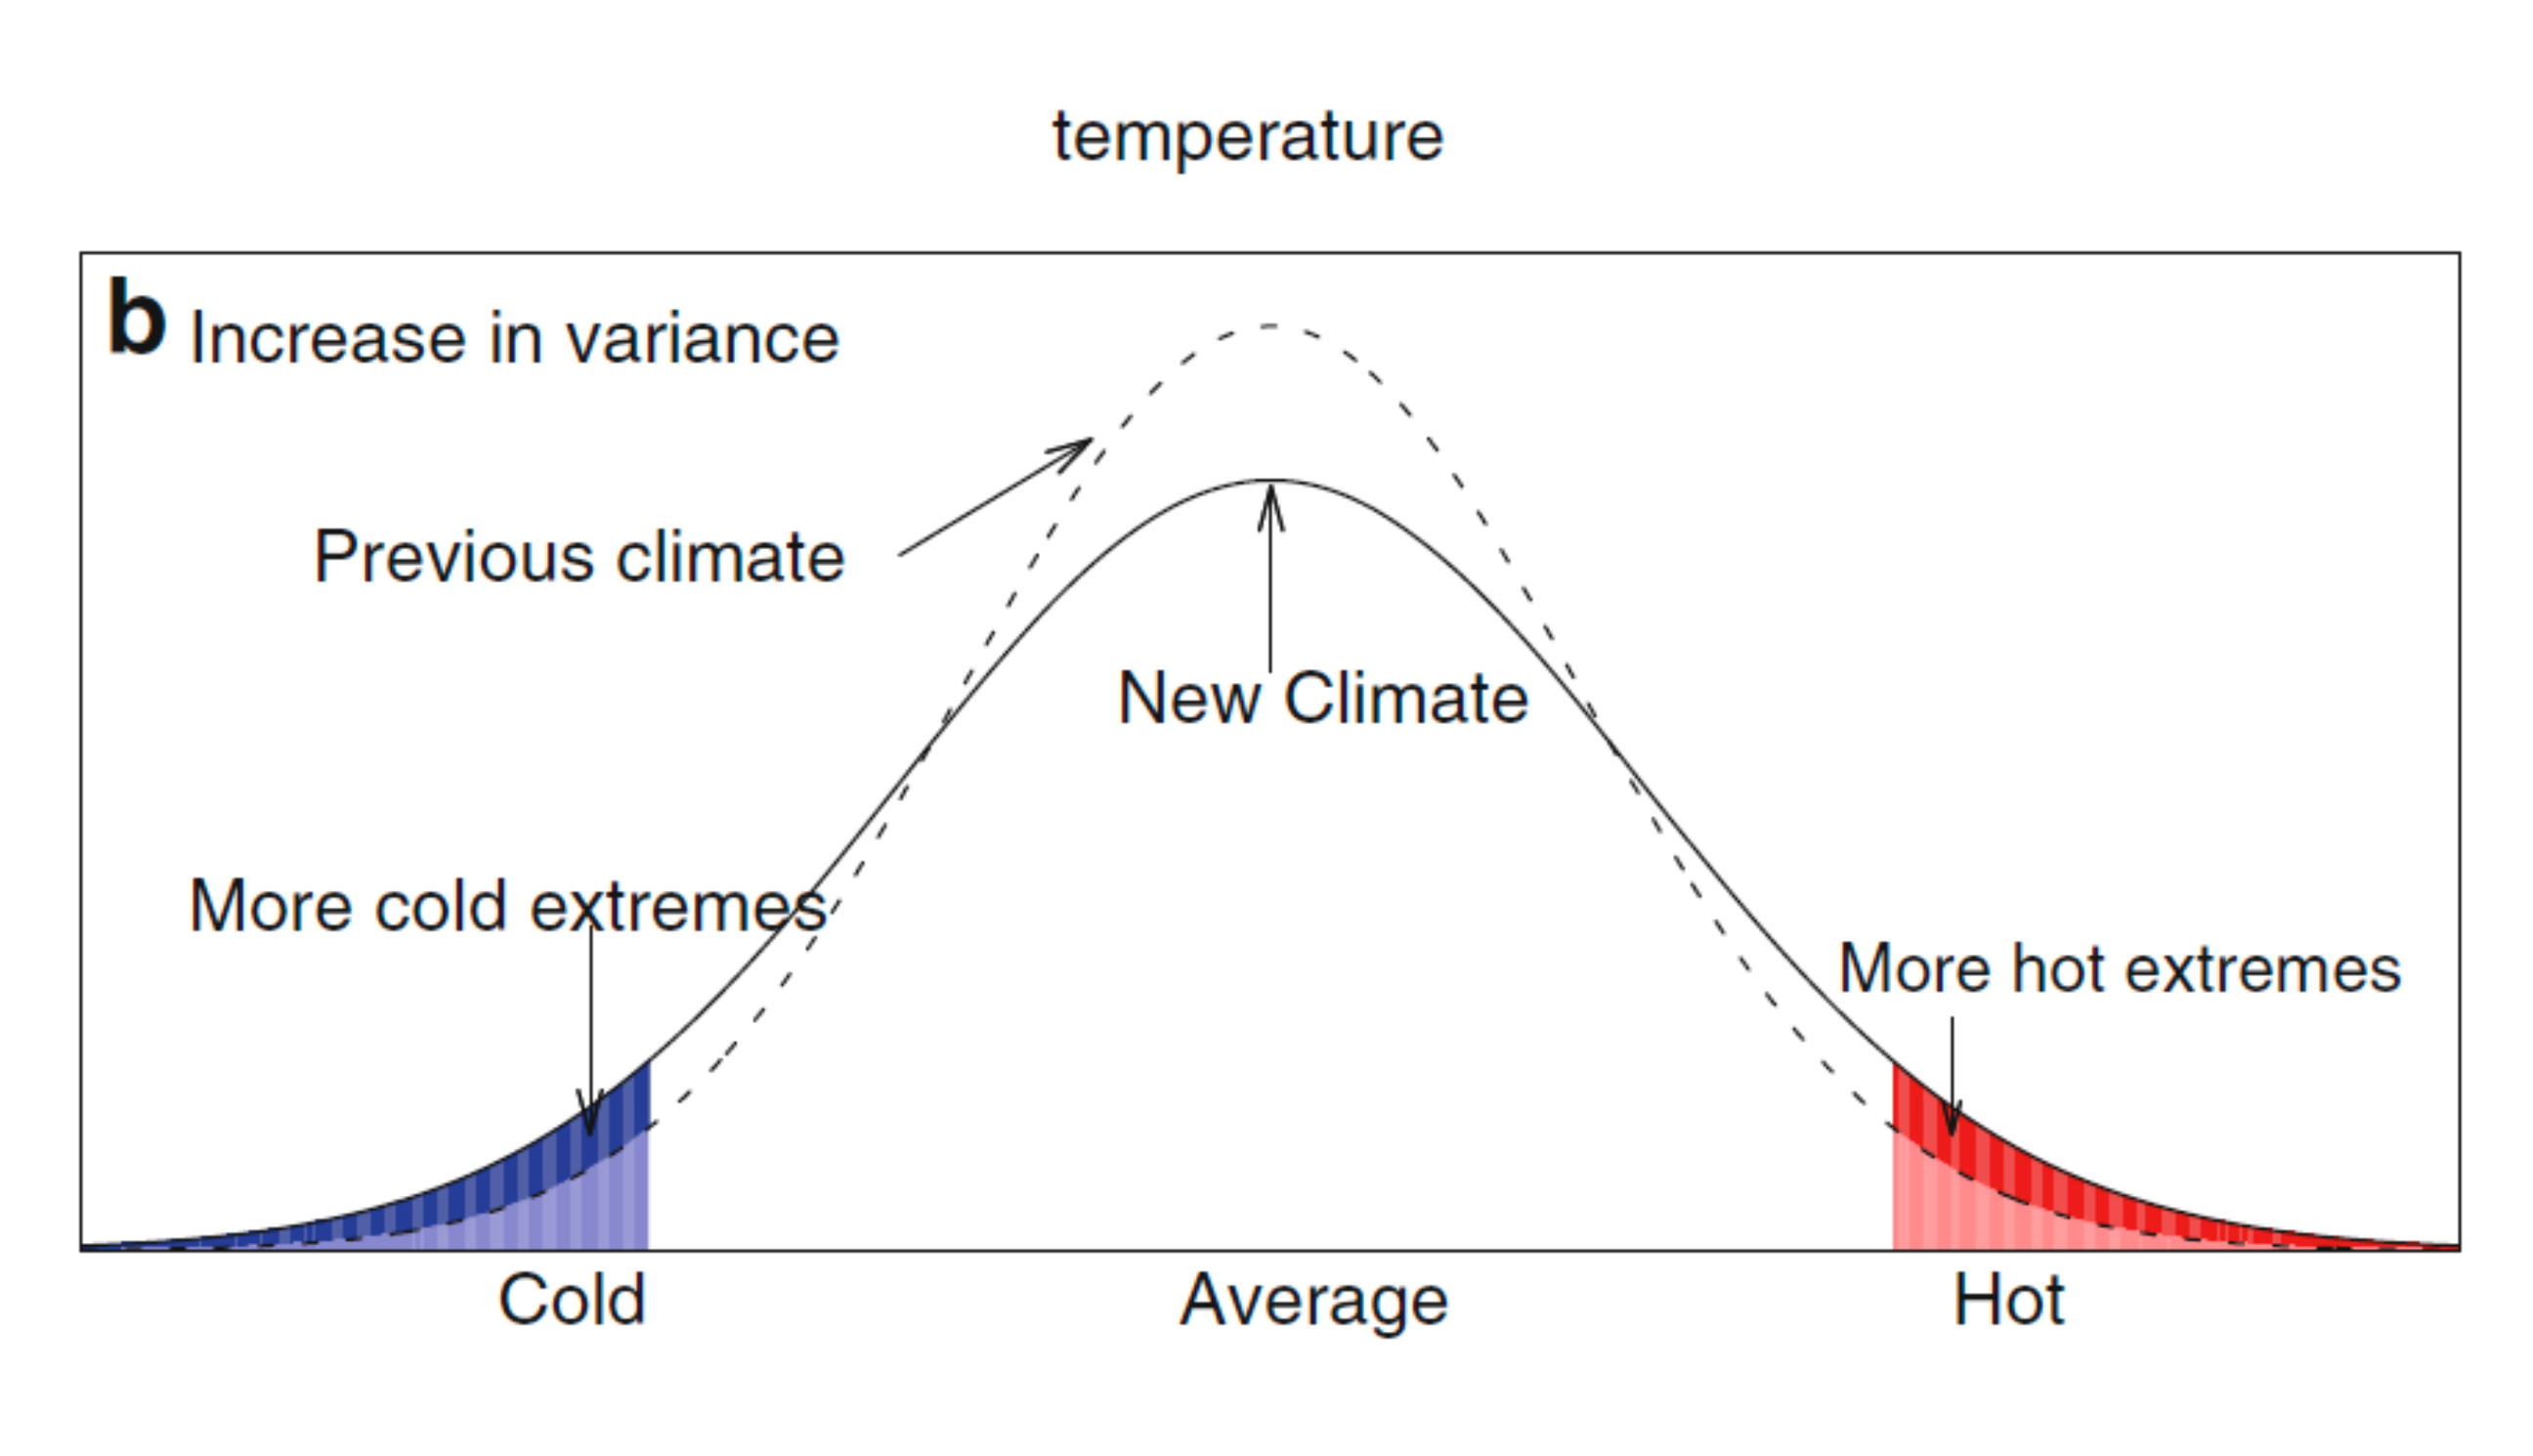

In [20]:
display(Image(filename = 'temperature_b.png', width= 600, height= 600))

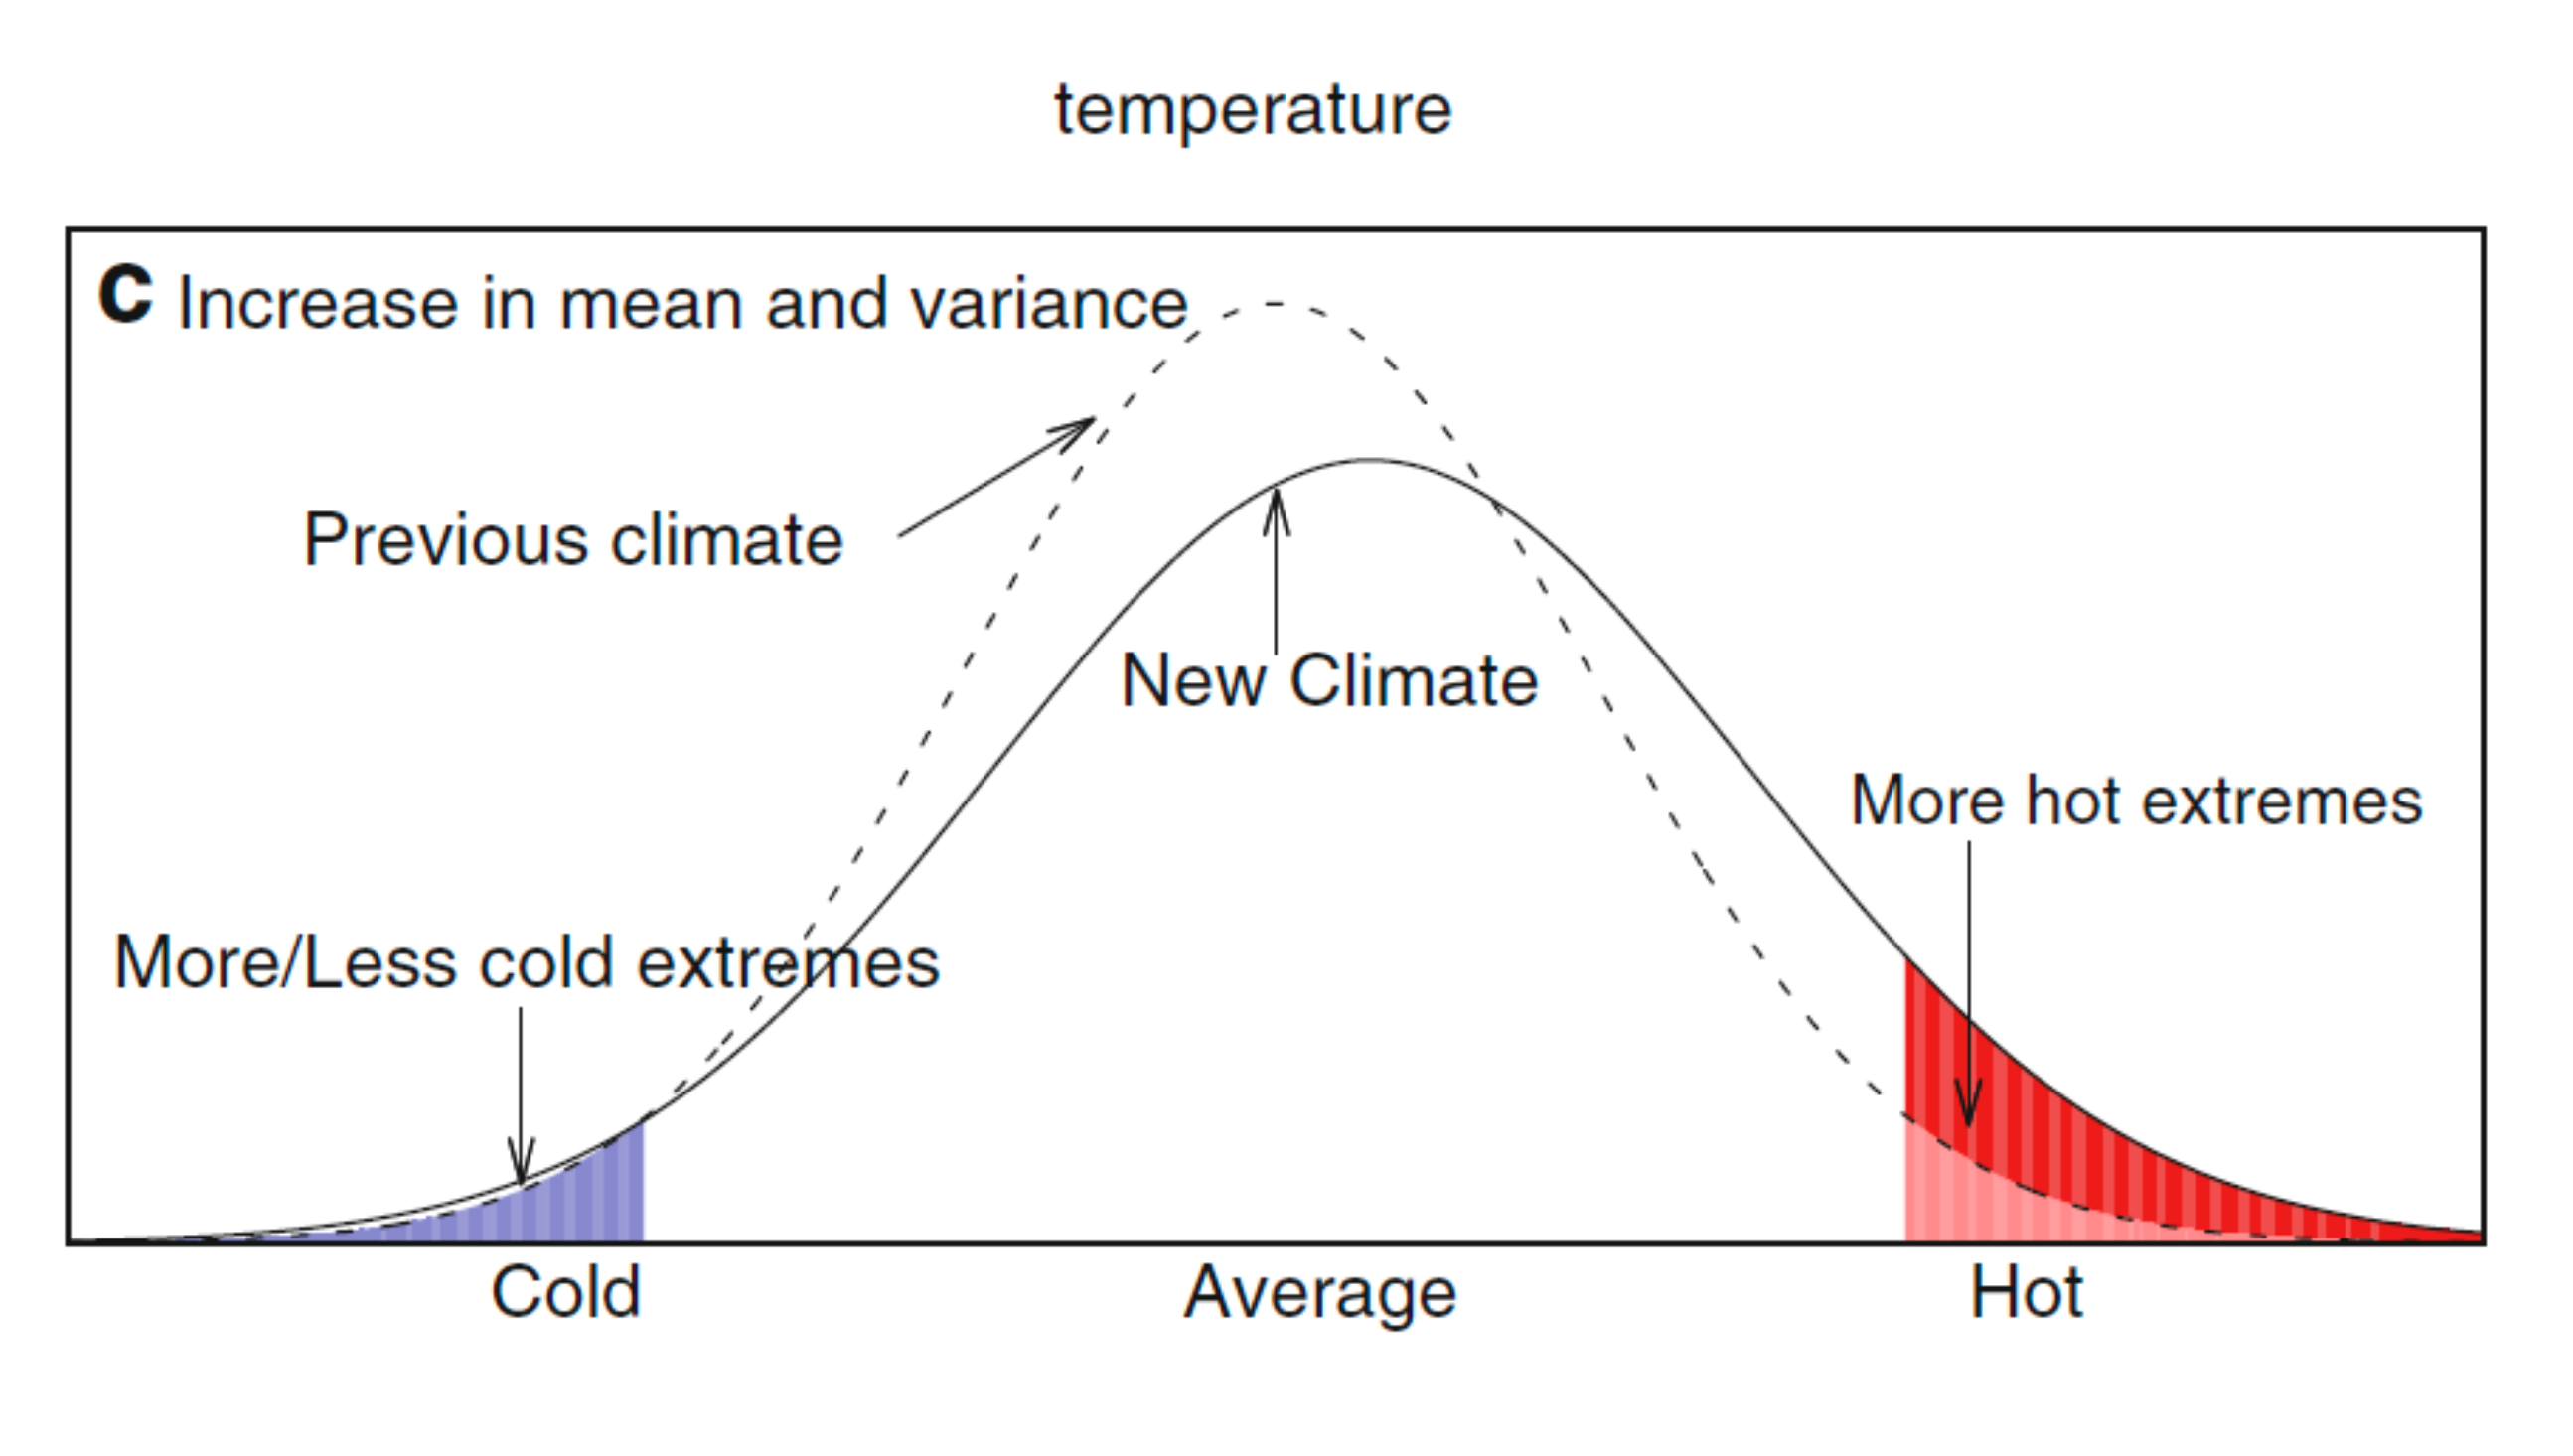

In [21]:
display(Image(filename = 'temperature_c.png', width= 600, height= 600))

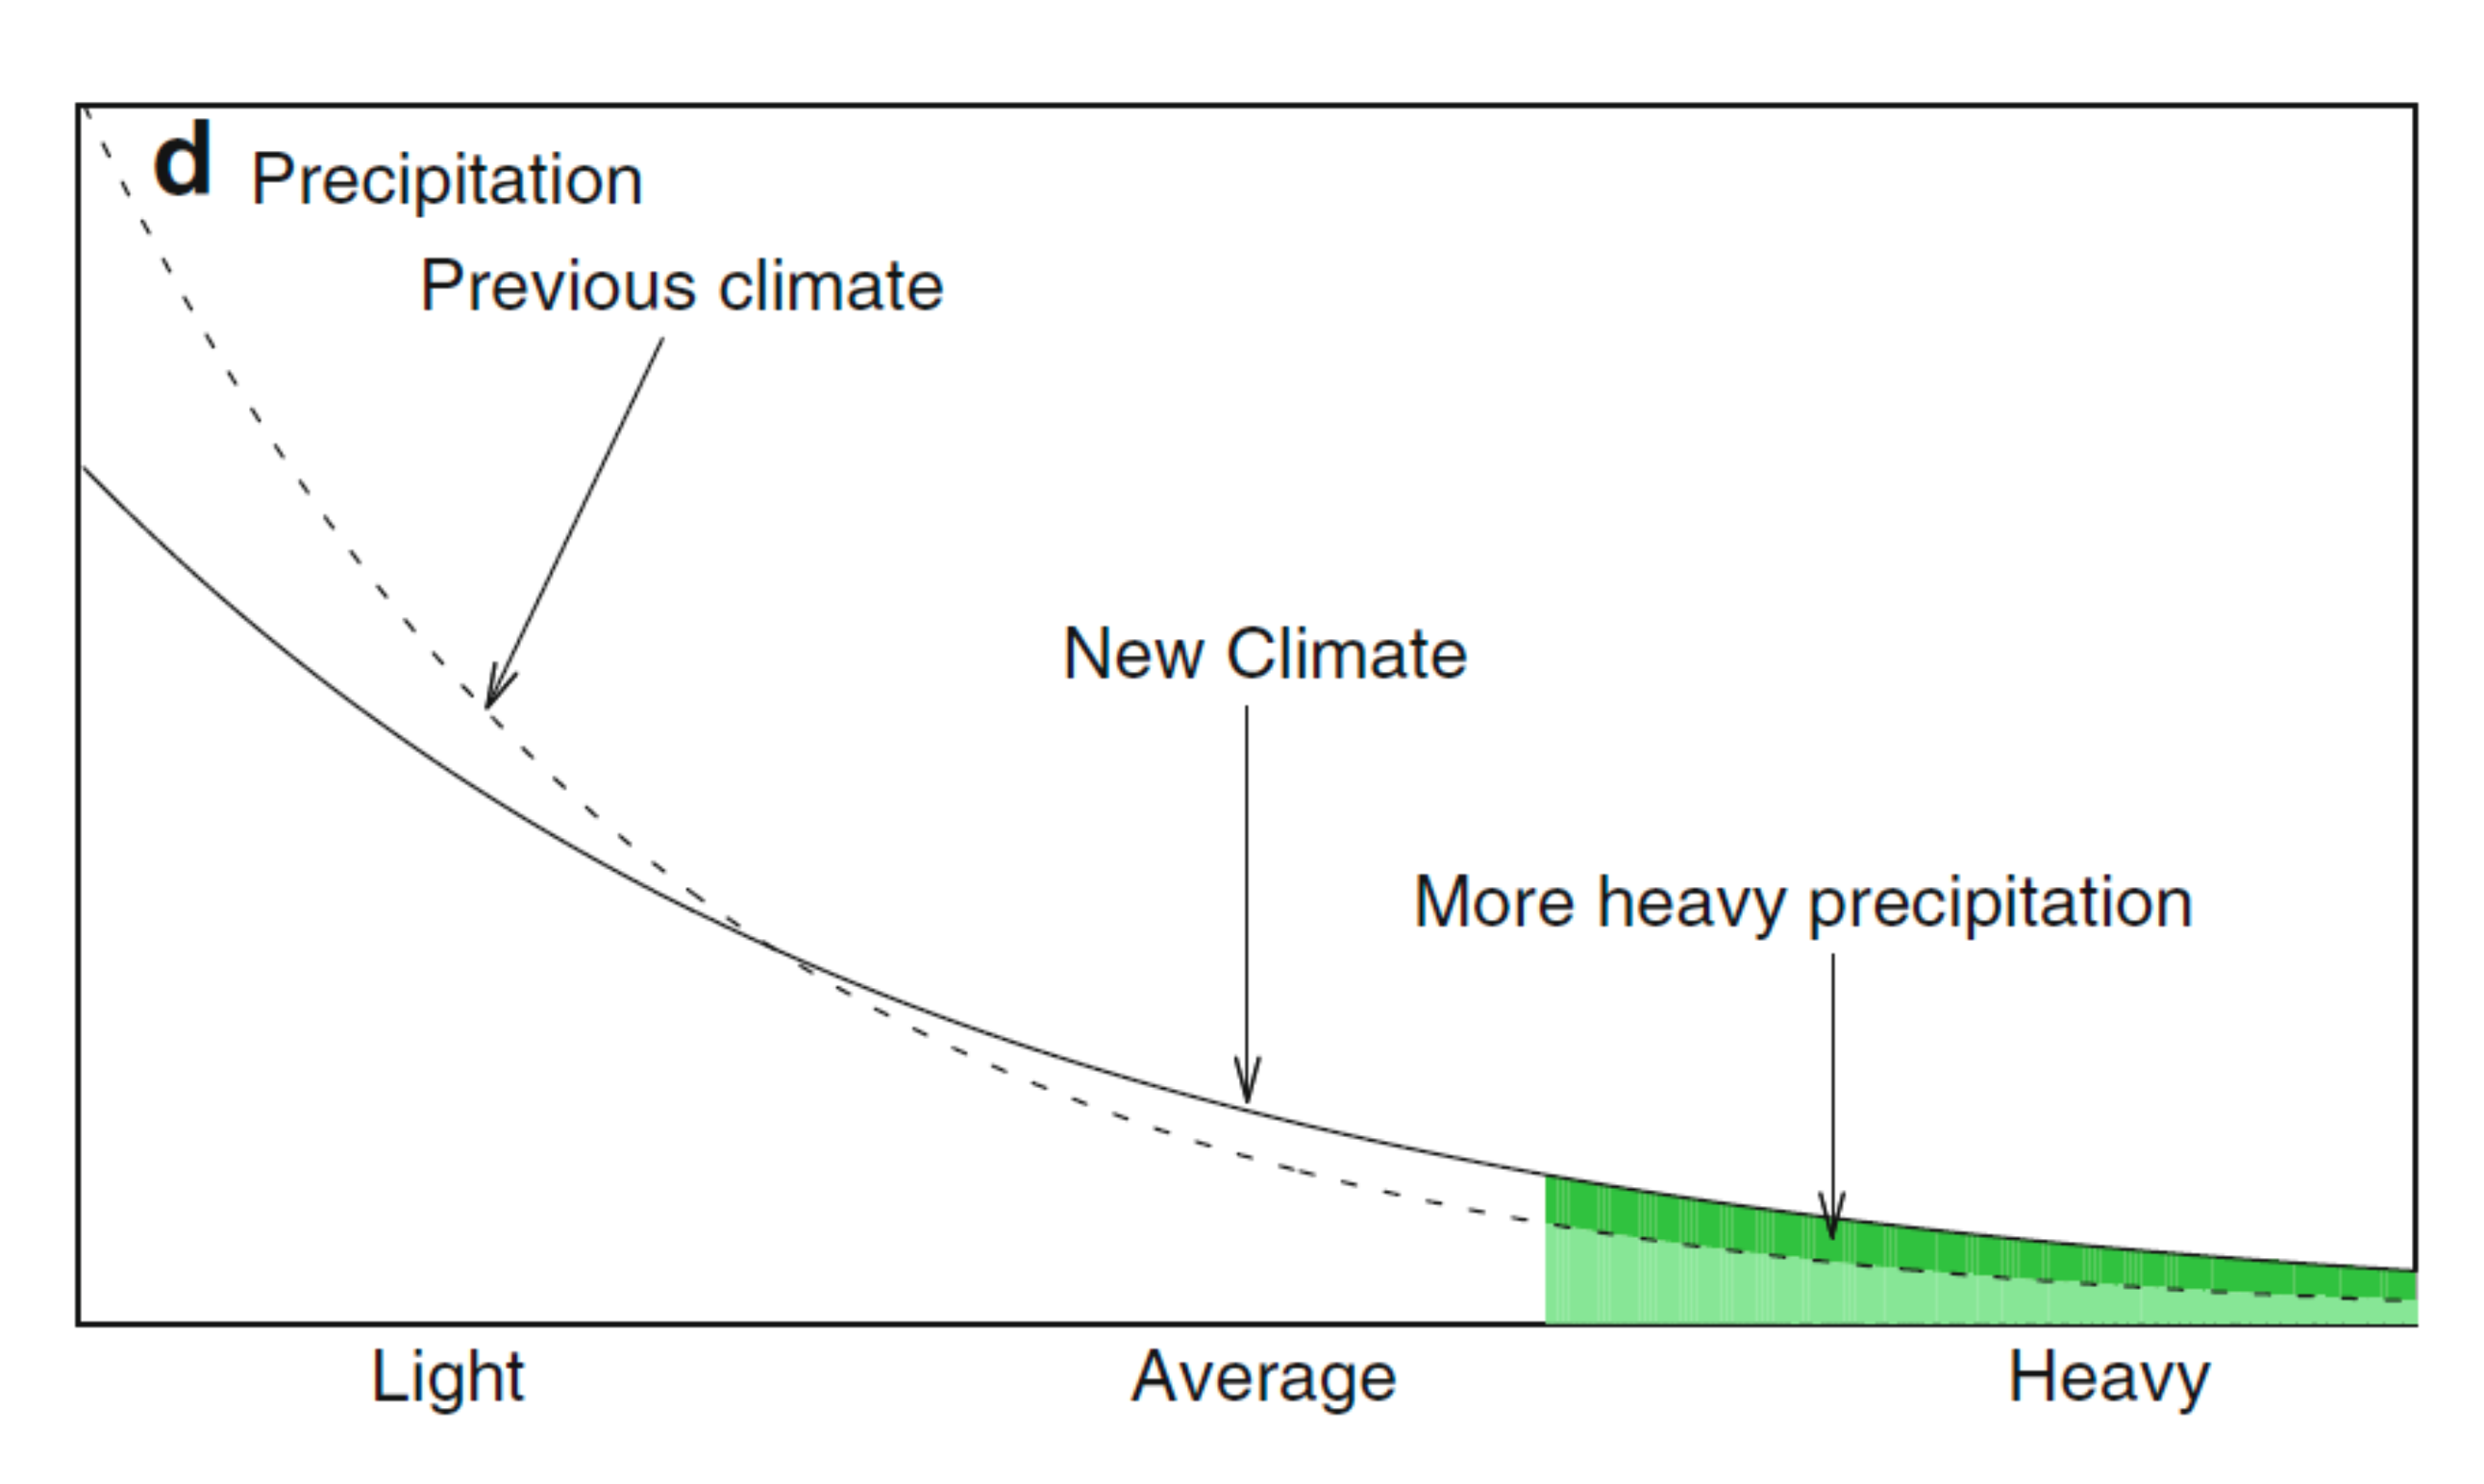

In [22]:
display(Image(filename = 'precipitation.png', width= 600, height= 600))

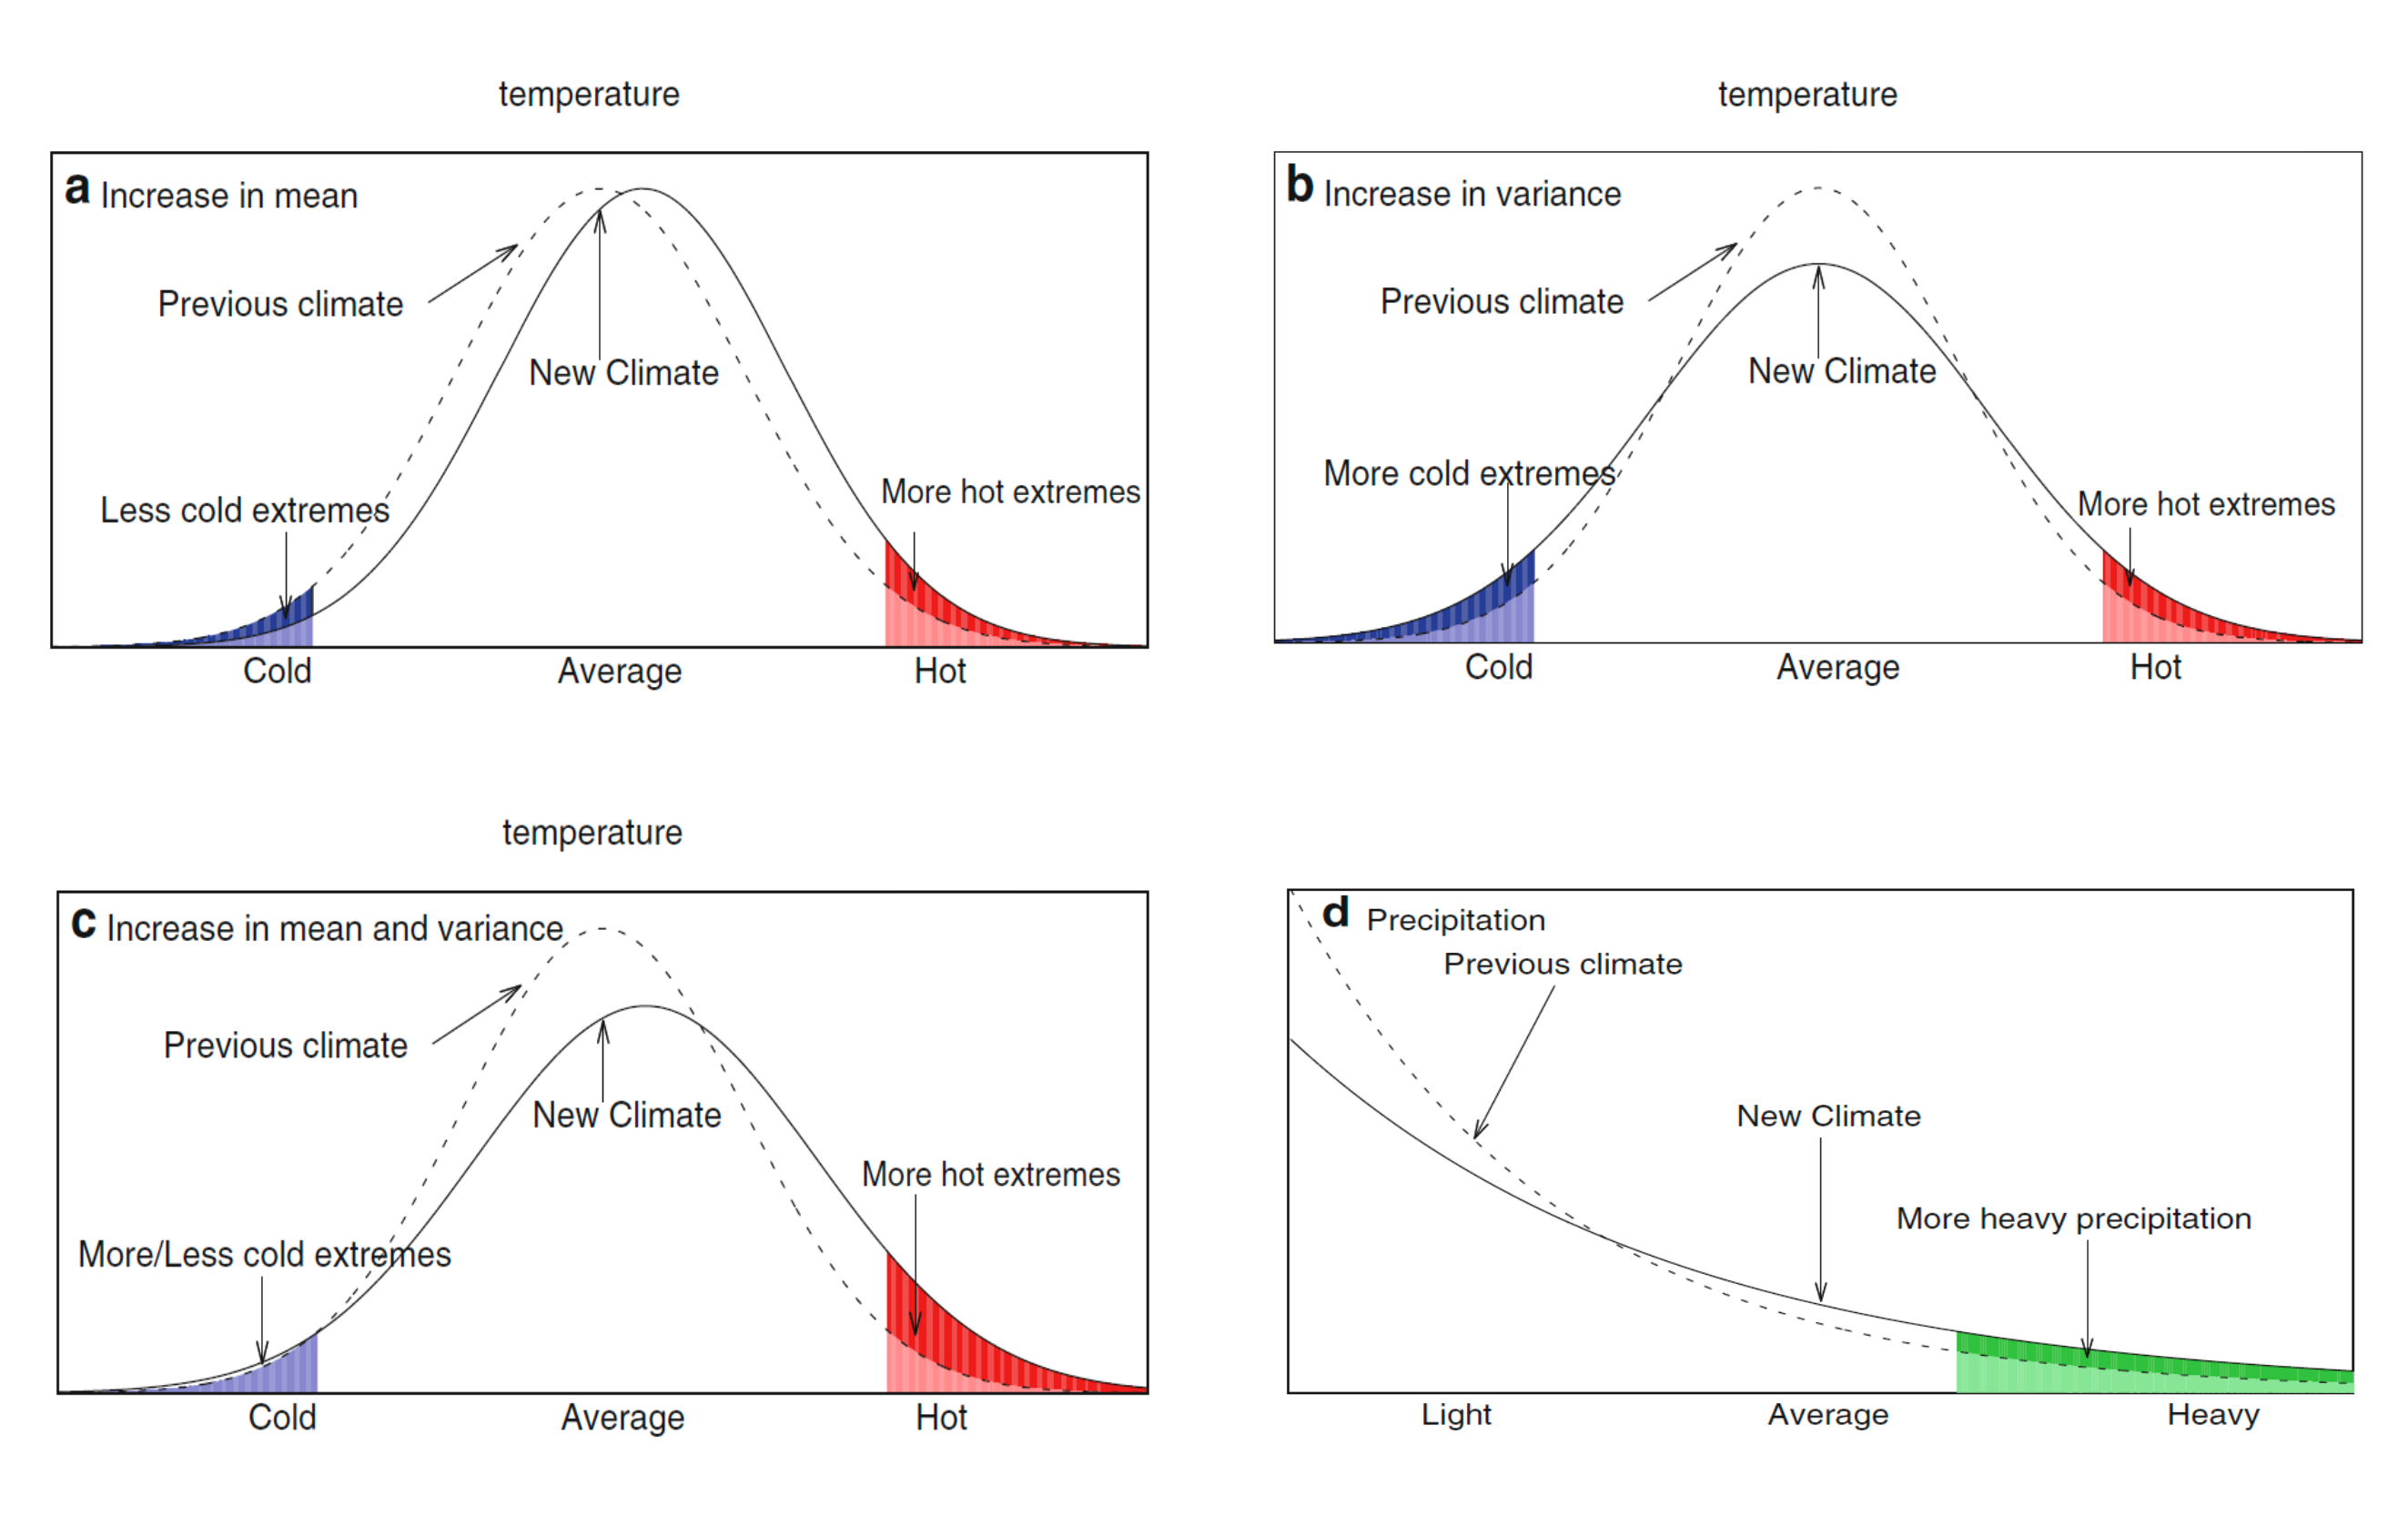

In [23]:
display(Image(filename = 'a-d changes.png', width= 1200, height= 1200))

#### How can we test if any of these changes is signficiant?

1- Start with a Null Hypothesis (H0) and at least one alternative hypothesis (H1)
For example, 
- **H0**: Mean temperature has not changed significantly over time.
- **H1**: Mean temperature has changed significantly over time.

2- Define a test statistic and a significane level

3- Test the Null Hypothesis

**Confidence Interval:** Confidence Interval represents the reliability of an estimate (e.g.,
occurrence probability of an extreme event). The lower and upper end
points Cl and Cu of this range (interval) are known as Confidence Limits.

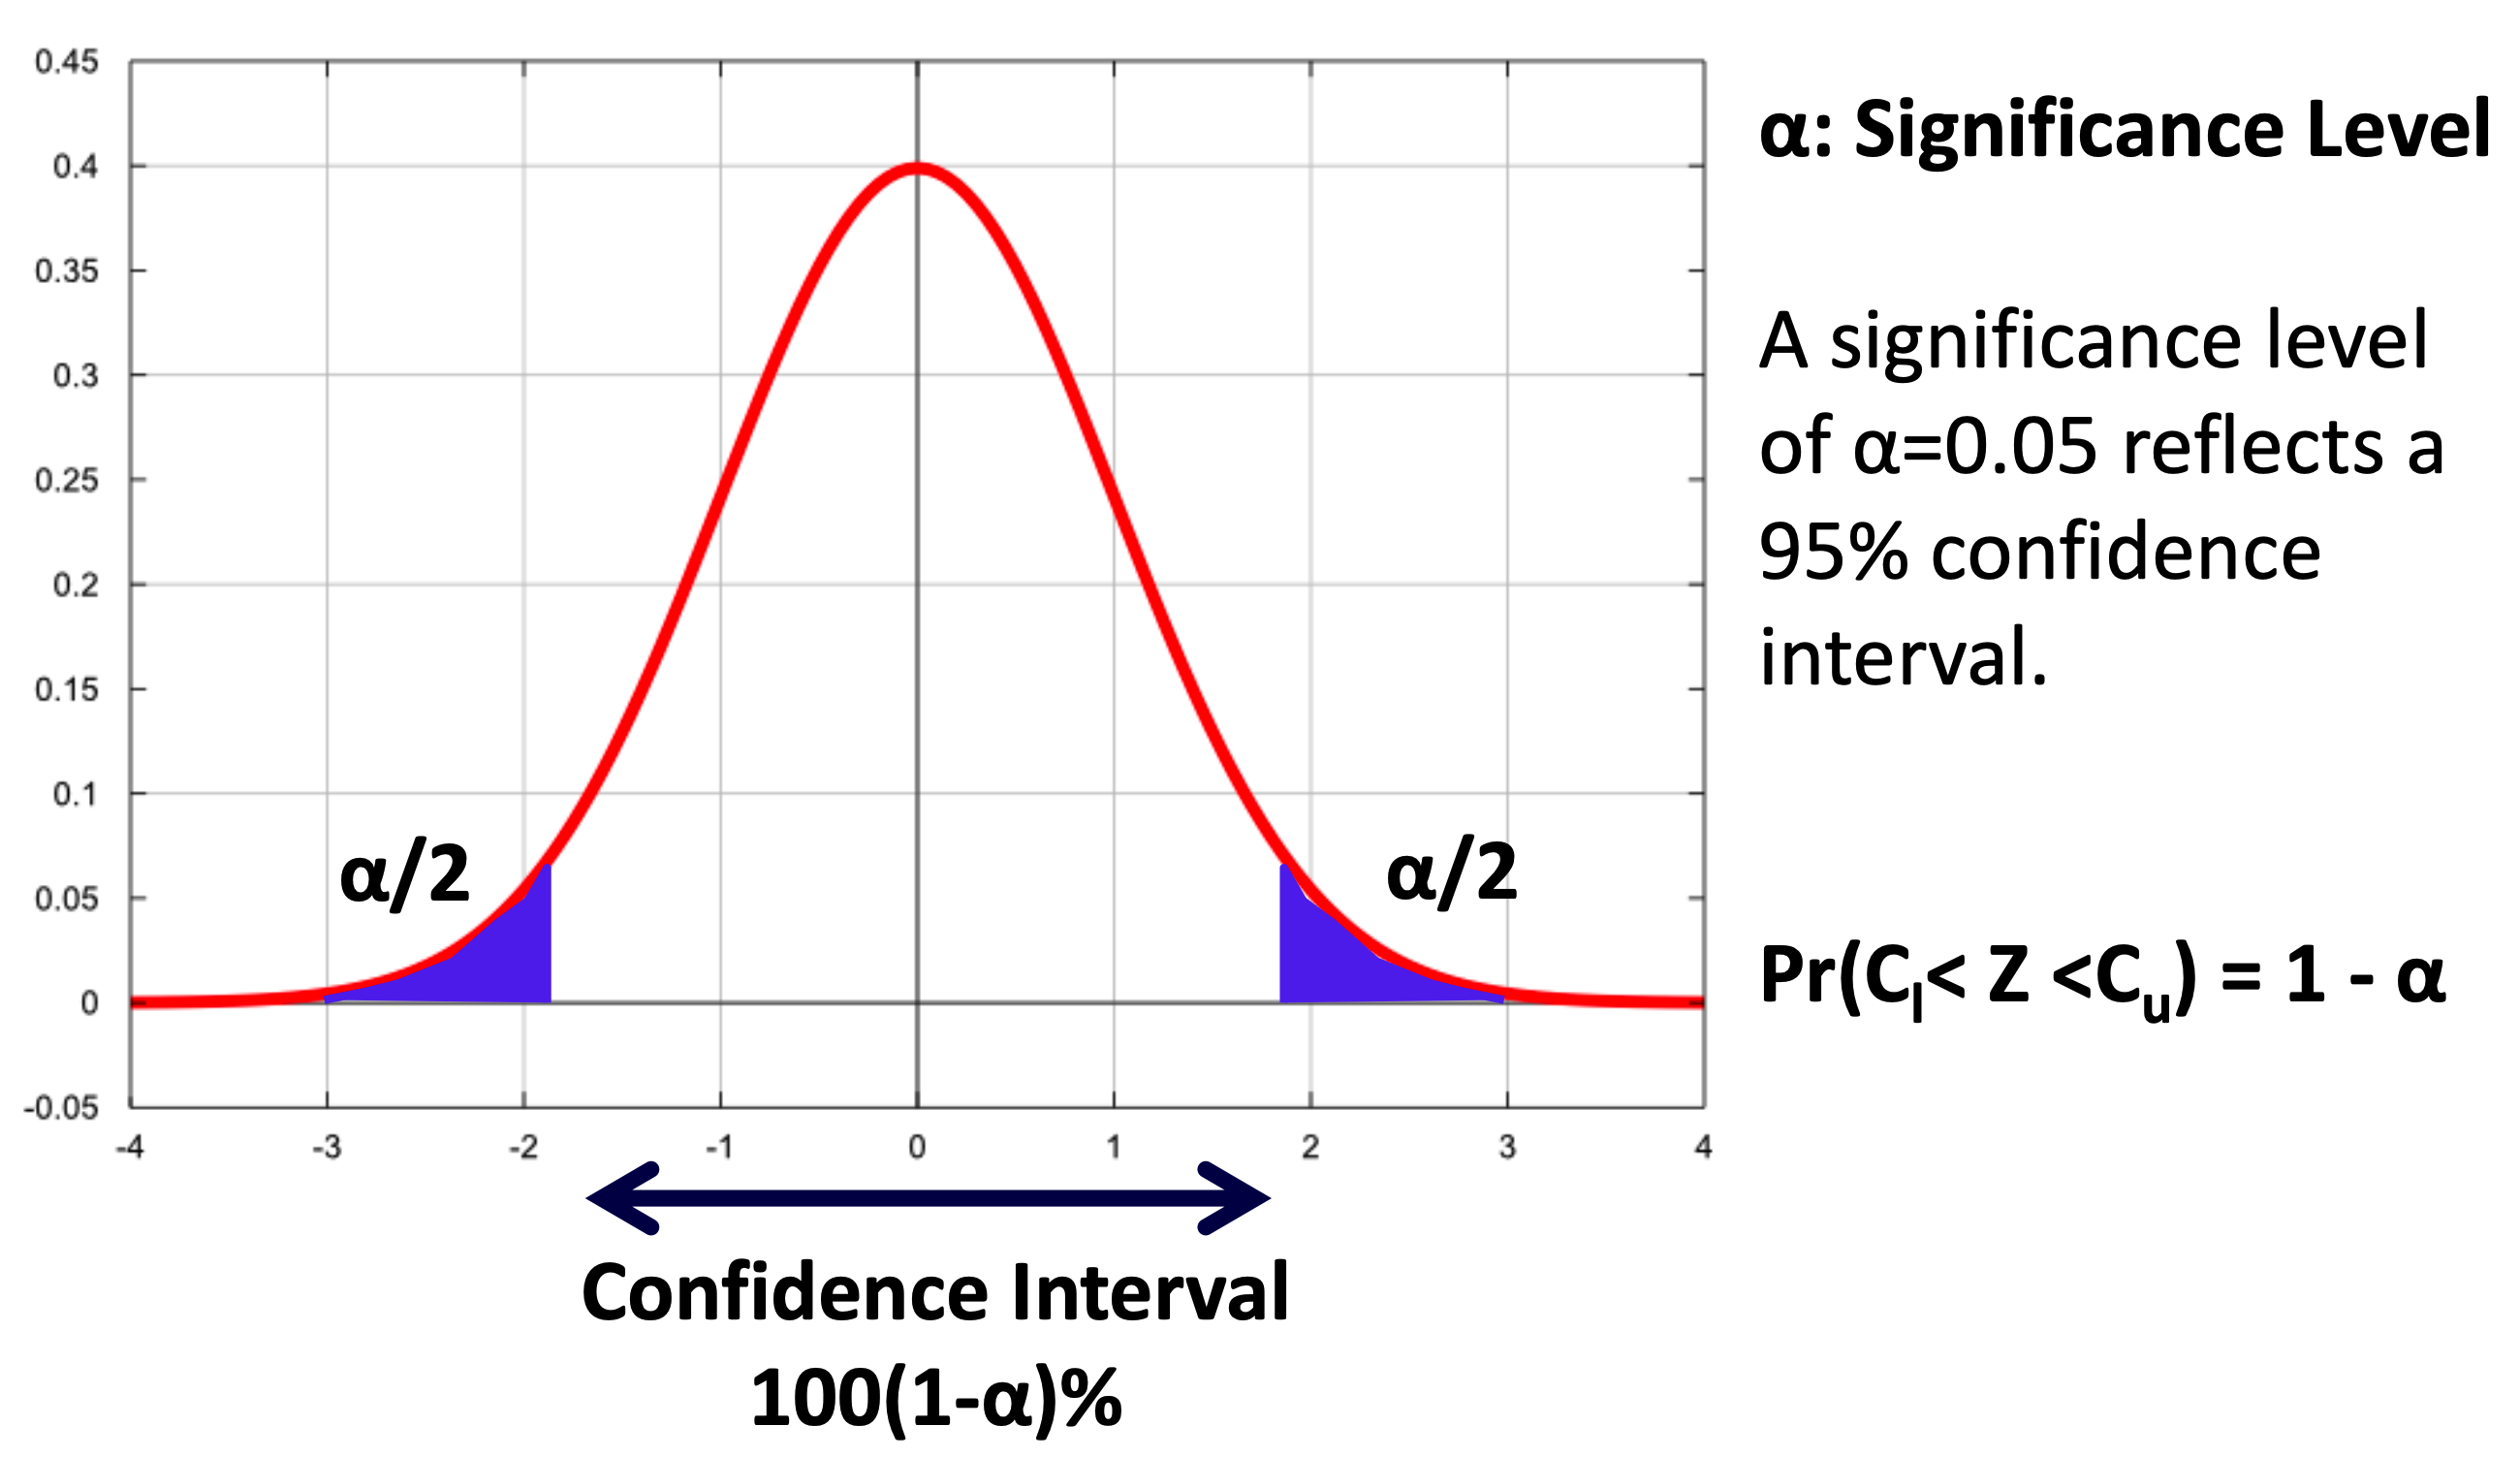

In [24]:
display(Image(filename = 'confidence interval and significance level.png', width= 1000, height= 1000))

## <center> Feature Selection </center>

Examine the data in the Canvas folder for feature selection